In [1]:
#For Kaggle
#date=''

#For WL data
source='WL'
date='20241118'

saveImage=False

print('done')

done


In [2]:
import sys
import os
from importlib import reload
fpath = os.path.join('..//scripts')
sys.path.append(fpath)

import warnings
warnings.filterwarnings('ignore')

#loading internal scripts
import frauddetection as fd
import sourcedata as sd
import dataimport as di
import result as resultMd
reload(fd)
reload(sd)
reload(di)
reload(resultMd)

print('done')

done


In [3]:
import pandas as pd

dfTrx = pd.read_csv('../data/cleaned/'+source+'export'+date+'.csv')
dfTrx.head(5)

,db_uuid,trx_date_time,term_mcc,term_country,mcd_fraud_score,vaa_score,TRX_3D_SECURED,trx_accepted,trx_cnp,card_pan_id,...,clusterMerchant_M0,clusterMerchant_M1,clusterMerchant_M2,clusterMerchant_M3,clusterMerchant_UNKNOWN,nbPreviousTrx,previousTrxAmountSumLog,trx_amount_log10,amountBin,distancePrevTrx
0,A3DEF420A53B11EFABA49D2778D26ADA,2024-11-18 00:25:43,5499,NLD,289.000000,26.258093,0,1,1,A4BF631BFD796F0D7D9A714E5AD1F5D26E8D70A4999F30...,...,1,0,0,0,0,0,0.0,1.763353,4,1.100000
1,31BFAC76A53C11EFABA49D2778D26ADA,2024-11-18 00:30:44,4215,BEL,148.000000,26.258093,1,1,1,6048F88F23C4D90D50615342B2445A0CD680E3D102E56C...,...,0,0,0,1,0,0,0.0,1.330617,3,0.768071
2,75A6059CA53811EFA6F9EF55A8E51A55,2024-11-18 00:03:02,5968,FRA,363.000000,26.258093,0,1,1,6081849BC94C237C841CDC43E06CAB46A25F9BE5DE3DF3...,...,1,0,0,0,0,0,0.0,0.902547,2,1.100000
3,C5DEFDAAA53A11EFAAA0DF784AB5695E,2024-11-18 00:09:37,5812,USA,225.222235,26.258093,0,1,0,60E1D8C417CDFDE242B10454048AEEF15CF15C39251BE1...,...,0,0,0,0,1,0,0.0,1.563837,4,1.000000
4,D4F9F3CCA53E11EFAB1F43D36D9BDFD5,2024-11-18 00:48:47,5942,LUX,225.222235,30.000000,0,1,0,AFEEC568C21C0640F97EACED2F4D9B25537D94CE391457...,...,1,0,0,0,0,0,0.0,1.546049,4,1.100000


In [ ]:
from sklearn.dummy import DummyClassifier
from datetime import datetime

predictors = []

x_train, x_test, y_train, y_test, scaler =fd.split_data(dfTrx,predictors)

then= datetime.now()
modelClf = DummyClassifier(strategy="most_frequent")
modelClf.fit(x_train, y_train)
predsTest = modelClf.predict(x_test)

now = datetime.now()
duration= now - then
duration_in_s = duration.total_seconds()
print("Duration ",duration_in_s)

f1,mcc,roc=fd.print_scores(y_test, predsTest,'all')

fd.show_importance(modelClf,predictors)
imageName=None
if(saveImage):
    imageName='../imgs/FD03A-dummyClassifierMatrixMostFrequent'  
fd.show_confusion_matrix(y_test, predsTest,imageName)

predsTrain = modelClf.predict(x_train)
f1,mcc,roc=fd.print_scores(y_train, predsTrain,'all')
fd.show_confusion_matrix(y_train, predsTrain,imageName)

Duration  0.082223
test-set confusion matrix:
 [[106035 105675]
 [   132    128]]
accuracy score: 0.5008
balanced accuracy score: 0.4966
recall score: 0.4923
precision score: 0.0012
f1 score: 0.0024
mcc score: -0.0005
roc auc score: 0.4966
test-set confusion matrix:
 [[423653 423186]
 [   497    543]]
accuracy score: 0.5003
balanced accuracy score: 0.5112
recall score: 0.5221
precision score: 0.0013
f1 score: 0.0026
mcc score: 0.0016
roc auc score: 0.5112
test-set confusion matrix:
 [[106035 105675]
 [   132    128]]
accuracy score: 0.5008
balanced accuracy score: 0.4966
recall score: 0.4923
precision score: 0.0012
f1 score: 0.0024
mcc score: -0.0005
roc auc score: 0.4966
No feature importance


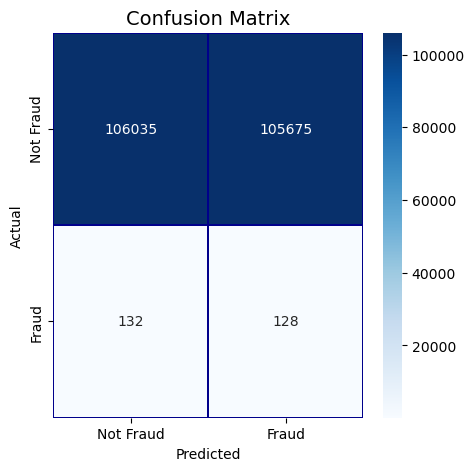

In [5]:
from sklearn.dummy import DummyClassifier
from datetime import datetime

predictors = []

x_train, x_test, y_train, y_test, scaler =fd.split_data(dfTrx,predictors)

then= datetime.now()
modelClf = DummyClassifier(strategy="uniform")
modelClf.fit(x_train, y_train)
predsTrain = modelClf.predict(x_train)
predsTest = modelClf.predict(x_test)

now = datetime.now()
duration= now - then
duration_in_s = duration.total_seconds()
print("Duration ",duration_in_s)

f1,mcc,roc=fd.print_scores(y_test, predsTest,'all')

fd.print_scores(y_train, predsTrain,'f1')
fd.print_scores(y_test, predsTest,'f1')
fd.show_importance(modelClf, predictors)
imageName=None
if(saveImage):
    imageName='../imgs/FD03A-dummyClassifierMatrixUniform'  
fd.show_confusion_matrix(y_test, predsTest,imageName)

Duration  0.170768
test-set confusion matrix:
 [[211455    255]
 [   260      0]]
accuracy score: 0.9976
balanced accuracy score: 0.4994
recall score: 0.0000
precision score: 0.0000
f1 score: 0.0000
mcc score: -0.0012
roc auc score: 0.4994
test-set confusion matrix:
 [[845830   1009]
 [  1040      0]]
accuracy score: 0.9976
balanced accuracy score: 0.4994
recall score: 0.0000
precision score: 0.0000
f1 score: 0.0000
mcc score: -0.0012
roc auc score: 0.4994
test-set confusion matrix:
 [[211455    255]
 [   260      0]]
accuracy score: 0.9976
balanced accuracy score: 0.4994
recall score: 0.0000
precision score: 0.0000
f1 score: 0.0000
mcc score: -0.0012
roc auc score: 0.4994
No feature importance


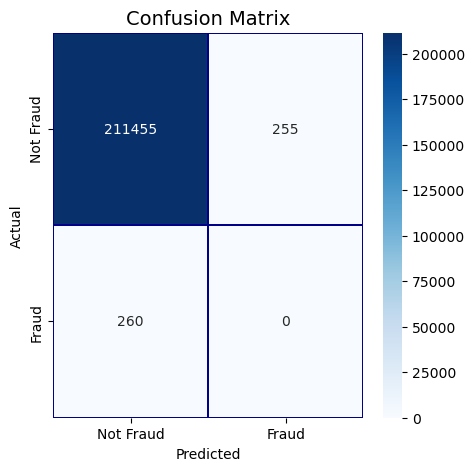

In [6]:
from sklearn.dummy import DummyClassifier
from datetime import datetime

predictors = []

x_train, x_test, y_train, y_test, scaler =fd.split_data(dfTrx,predictors)

then= datetime.now()
modelClf = DummyClassifier(strategy="stratified")
modelClf.fit(x_train, y_train)
predsTrain = modelClf.predict(x_train)
predsTest = modelClf.predict(x_test)

now = datetime.now()
duration= now - then
duration_in_s = duration.total_seconds()
print("Duration ",duration_in_s)

f1,mcc,roc=fd.print_scores(y_test, predsTest,'all')


fd.print_scores(y_train, predsTrain,'f1')
fd.print_scores(y_test, predsTest,'f1')
fd.show_importance(modelClf, predictors)
imageName=None
if(saveImage):
    imageName='../imgs/FD03A-dummyClassifierMatrixStratified'  
fd.show_confusion_matrix(y_test, predsTest,imageName)